In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# Random Forest Prediction

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

corr_01 = pd.read_csv('dataframes/corr_01.csv', na_values='')

numerical_df = corr_01.select_dtypes(include=[np.number])
numerical_df = numerical_df.dropna(axis=1)  # drop any columns with missing data

# prepare the data for the model
X = numerical_df.drop(['PCT_SE_A09005_008'], axis=1)  # feature columns
y = numerical_df['PCT_SE_A09005_008']  # target column

# Split the data into training and testing sets[[']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Use the model to predict the test set results
y_pred = rf.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate Model Accuracy
r_sqr = rf.score(X_test, y_test)

print(f'R square: {r_sqr}')
print(f'Root Mean Squared Error: {rmse}')

R square: 0.83893598812788
Root Mean Squared Error: 2.6185466086585505


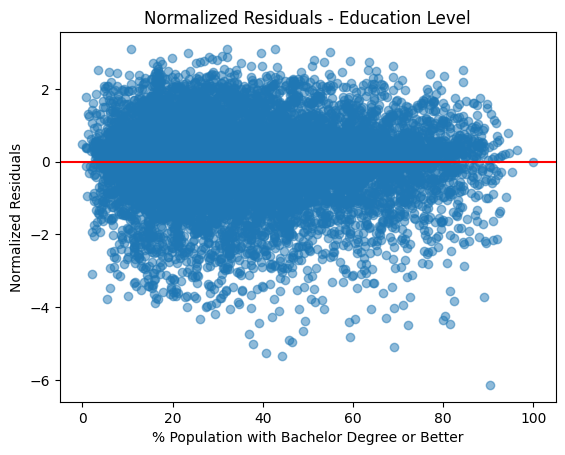

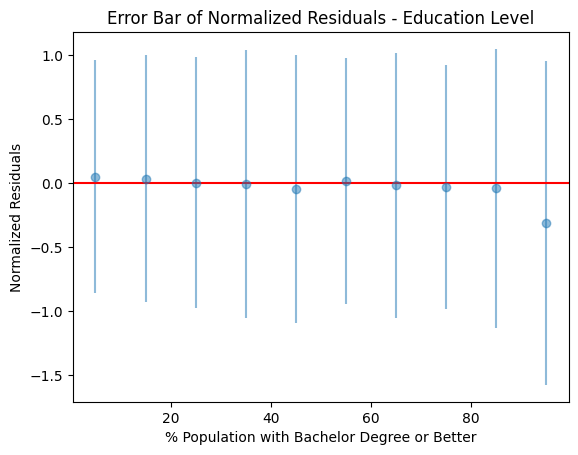

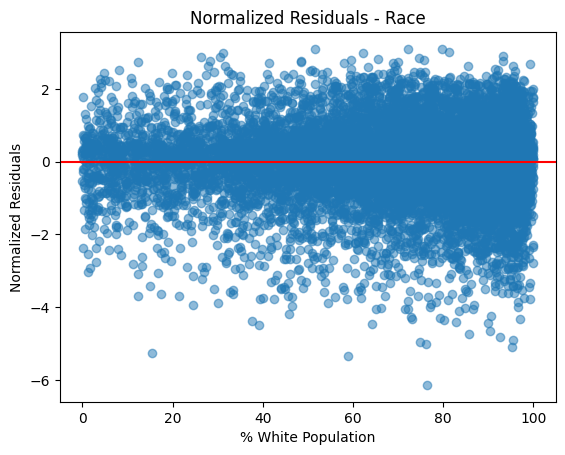

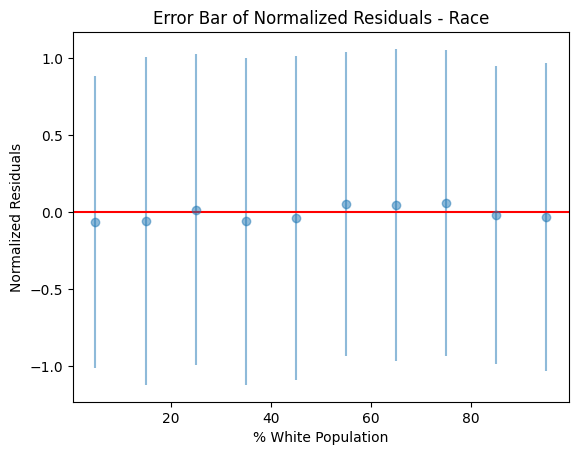

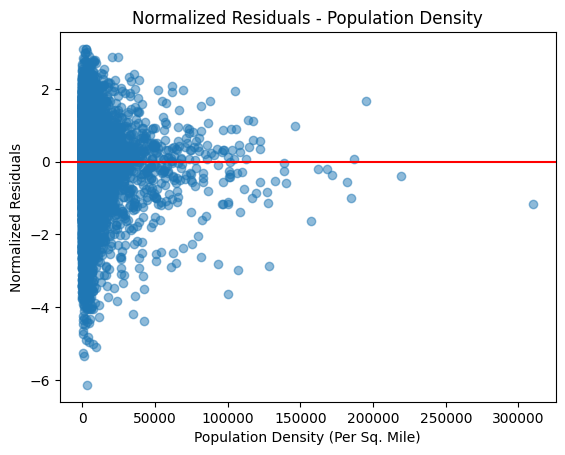

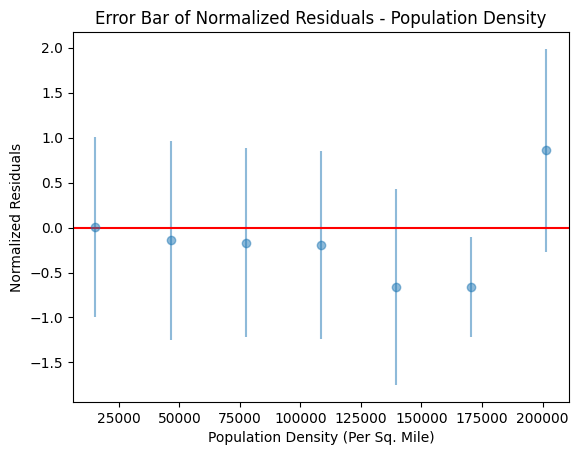

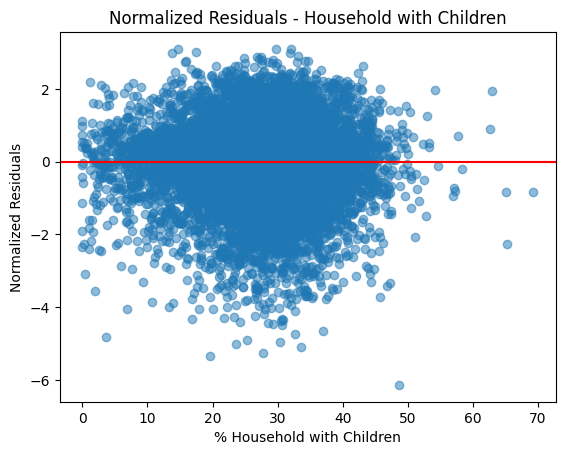

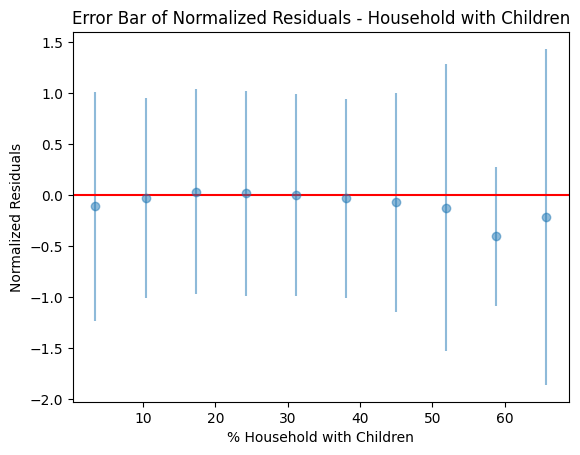

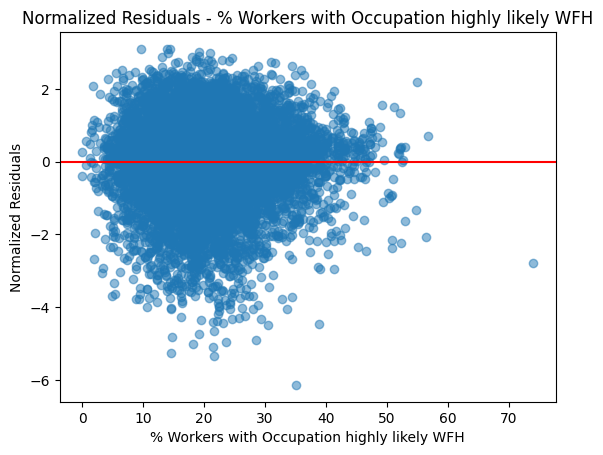

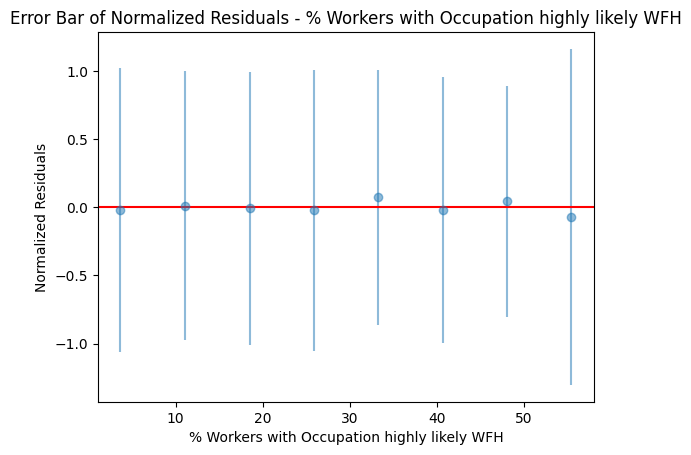

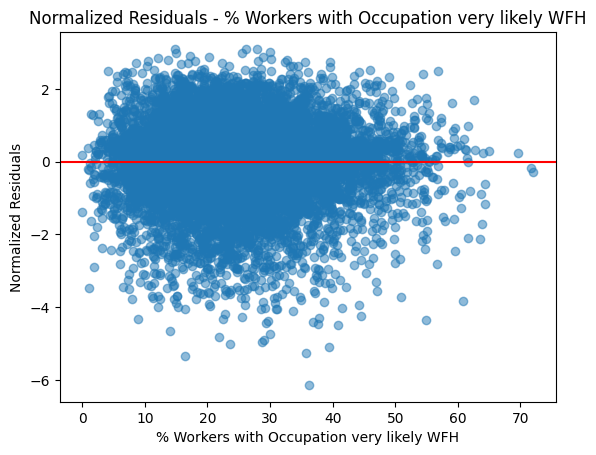

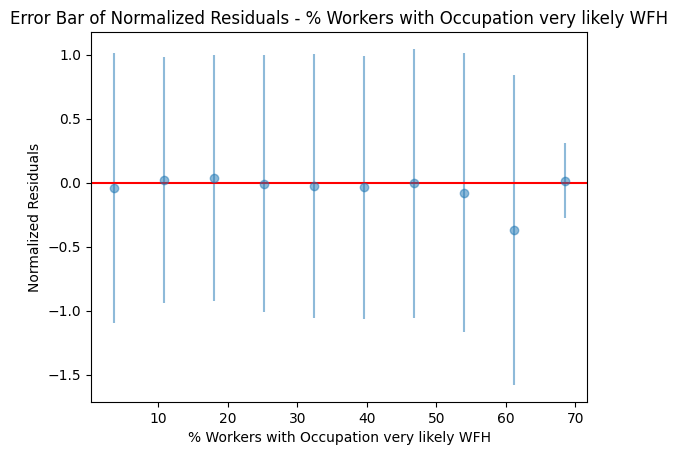

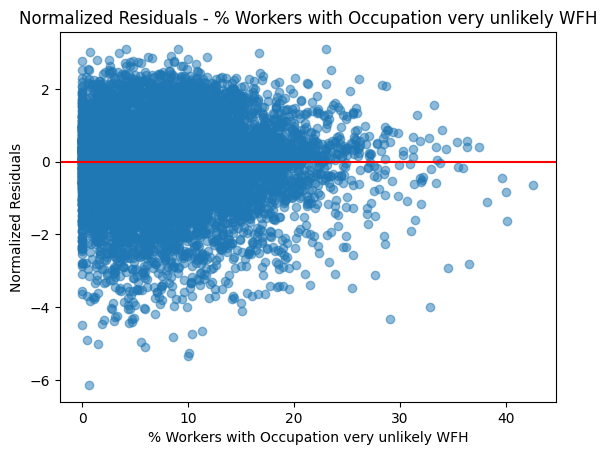

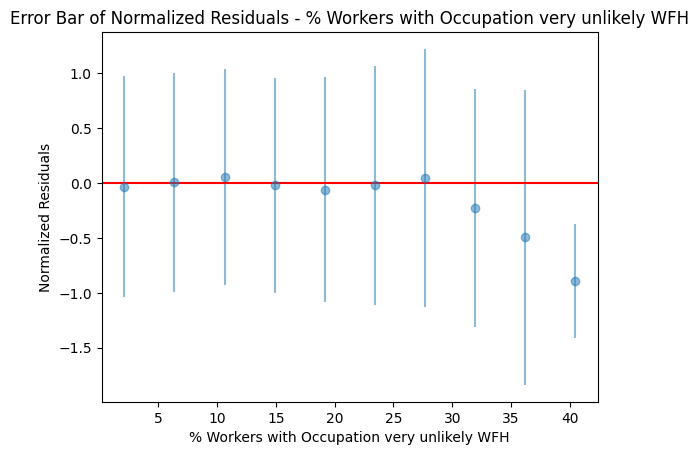

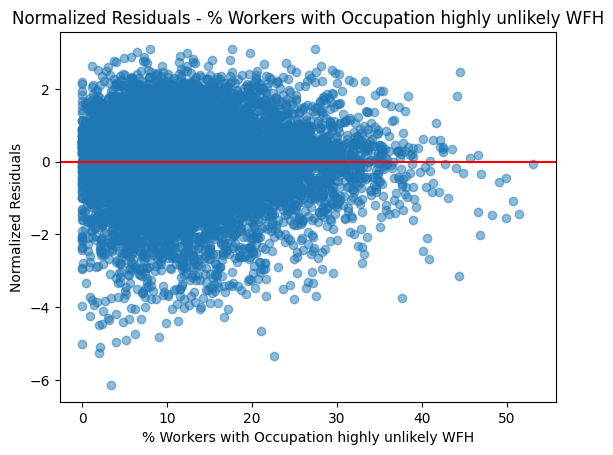

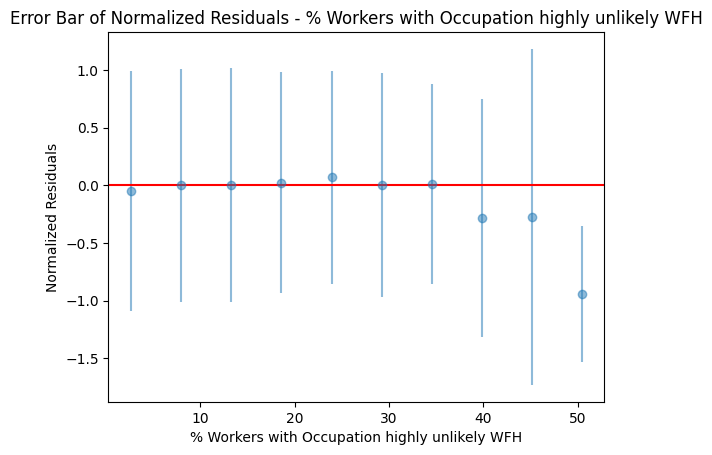

In [3]:
from sklearn.preprocessing import StandardScaler

# Calculate residuals
residuals = y_test - y_pred
residuals_normalized_pre = residuals / y_test

# Normalize the residuals
scaler = StandardScaler()
residuals_normalized = scaler.fit_transform(residuals_normalized_pre.values.reshape(-1, 1))

# Convert normalized residuals back to pandas Series
residuals_normalized = pd.Series(residuals_normalized.flatten(), index=residuals_normalized_pre.index)

from plotResults import plot_residual
plot_residual(X_test['PCT_SE_B12001_004'], residuals_normalized, 'Normalized Residuals - Education Level', '% Population with Bachelor Degree or Better')
plot_residual(X_test['PCT_SE_A03001_002'], residuals_normalized, 'Normalized Residuals - Race', '% White Population')
plot_residual(X_test['SE_A00002_002'], residuals_normalized, 'Normalized Residuals - Population Density', 'Population Density (Per Sq. Mile)')
plot_residual(X_test['PCT_SE_A10007A_014'], residuals_normalized, 'Normalized Residuals - Household with Children', '% Household with Children')
plot_residual(X_test['PCT_+4_ocp'], residuals_normalized, 'Normalized Residuals - % Workers with Occupation highly likely WFH', '% Workers with Occupation highly likely WFH')
plot_residual(X_test['PCT_+2_ocp'], residuals_normalized, 'Normalized Residuals - % Workers with Occupation very likely WFH', '% Workers with Occupation very likely WFH')
plot_residual(X_test['PCT_-2_ocp'], residuals_normalized, 'Normalized Residuals - % Workers with Occupation very unlikely WFH', '% Workers with Occupation very unlikely WFH')
plot_residual(X_test['PCT_-4_ocp'], residuals_normalized, 'Normalized Residuals - % Workers with Occupation highly unlikely WFH', '% Workers with Occupation highly unlikely WFH')


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
# }

# # Initialize the model
# rf = RandomForestRegressor(random_state=42)

# # Initialize the grid search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# # Train and predict using the model with the best parameters
# rf_best = RandomForestRegressor(**best_params, random_state=42)
# rf_best.fit(X_train, y_train)
# y_pred = rf_best.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Calculate Model Accuracy
# r_sqr = rf_best.score(X_test, y_test)

# print(f'Best Parameters: {best_params}')
# print(f'R square: {r_sqr}')
# print(f'Root Mean Squared Error: {rmse}')

# Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
# R square: 0.5957757738307609
# Root Mean Squared Error: 2.491445576945272


In [ ]:
# ### Best Random Forest

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the model with the best parameters
# rf = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_depth=None, random_state=42)

# # Fit the model on the training data
# rf.fit(X_train, y_train)

# # Use the model to predict the test set results
# y_pred = rf.predict(X_test)

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# # Calculate Model Accuracy
# r_sqr = rf.score(X_test, y_test)

# print(f'R square: {r_sqr}')
# print(f'Root Mean Squared Error: {rmse}')

In [ ]:
## Multi-OLS

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# predictor variables are stored in X and your target variable in y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the independent value
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Conduct the multiple linear regression
model = sm.OLS(y_train, X_train).fit()

# Print the summary statistics of the regression model
print(model.summary())

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_sqr = model.rsquared

print(f'R square: {r_sqr}')
print(f'Root Mean Squared Error: {rmse}')


In [ ]:
# Calculate residuals
residuals = y_test - y_pred
residuals_normalized_pre = residuals / y_test

# Normalize the residuals
scaler = StandardScaler()
residuals_normalized = scaler.fit_transform(residuals_normalized_pre.values.reshape(-1, 1))

# Convert normalized residuals back to pandas Series
residuals_normalized = pd.Series(residuals_normalized.flatten(), index=residuals_normalized_pre.index)

# variable names
title = 'Normalized Residuals/Actual Values - Education Level'
xlab = '% Population with Bachelor Degree or Better'
vardata = X_test['PCT_SE_B12001_004']

# Create a scatter plot of the normalized residuals
plt.scatter(vardata, residuals_normalized, alpha=0.5)
plt.xlabel(xlab)
plt.ylabel('Normalized Residuals/Actual Values')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title(title)
plt.show()

import numpy as np

# Define the number of bins
n_bins = 10

# Create bins for '% Population with Bachelor Degree or Better'
bins = pd.cut(vardata, bins=n_bins)

# Compute bin centers
bin_centers = (bins.cat.categories.right + bins.cat.categories.left) / 2

# Group by the bins and calculate the mean and standard deviation of the normalized residuals
mean_residuals = residuals_normalized.groupby(bins).mean()
std_residuals = residuals_normalized.groupby(bins).std()

# Create a DataFrame that stores the bin centers, mean residuals, and standard deviation of the residuals
data = pd.DataFrame({
    'BinCenters': bin_centers,
    'MeanResiduals': mean_residuals,
    'StdResiduals': std_residuals
}).dropna()

# Plot the mean normalized residuals for each bin as points with error bars
plt.errorbar(data['BinCenters'], data['MeanResiduals'], yerr=data['StdResiduals'], fmt='o', alpha=0.5)
plt.xlabel(xlab)
plt.ylabel('Mean Normalized Residuals/Actual Values')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title('Error Bar of ' + title)
plt.show()

In [ ]:
# Calculate residuals
residuals = y_test - y_pred
residuals_normalized_pre = residuals / y_test

# Normalize the residuals
scaler = StandardScaler()
residuals_normalized = scaler.fit_transform(residuals_normalized_pre.values.reshape(-1, 1))

# Convert normalized residuals back to pandas Series
residuals_normalized = pd.Series(residuals_normalized.flatten(), index=residuals_normalized_pre.index)

# variable names
title = 'Normalized Residuals/Actual Values - Race'
xlab = '% White Population'
vardata = X_test['PCT_SE_A03001_002']

# Create a scatter plot of the normalized residuals
plt.scatter(vardata, residuals_normalized, alpha=0.5)
plt.xlabel(xlab)
plt.ylabel('Normalized Residuals/Actual Values')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title(title)
plt.show()

# Define the number of bins
n_bins = 10

# Create bins for '% Population with Bachelor Degree or Better'
bins = pd.cut(vardata, bins=n_bins)

# Compute bin centers
bin_centers = (bins.cat.categories.right + bins.cat.categories.left) / 2

# Group by the bins and calculate the mean and standard deviation of the normalized residuals
mean_residuals = residuals_normalized.groupby(bins).mean()
std_residuals = residuals_normalized.groupby(bins).std()

# Create a DataFrame that stores the bin centers, mean residuals, and standard deviation of the residuals
data = pd.DataFrame({
    'BinCenters': bin_centers,
    'MeanResiduals': mean_residuals,
    'StdResiduals': std_residuals
}).dropna()

# Plot the mean normalized residuals for each bin as points with error bars
plt.errorbar(data['BinCenters'], data['MeanResiduals'], yerr=data['StdResiduals'], fmt='o', alpha=0.5)
plt.xlabel(xlab)
plt.ylabel('Mean Normalized Residuals/Actual Values')
plt.axhline(y=0, color='r', linestyle='-') # This line indicates where residuals would be 0
plt.title('Error Bar of ' + title)
plt.show()